In [42]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/dataset/UCMerced_LandUse.zip' -d '/content/drive/My Drive/dataset/ucmerced'

Archive:  /content/drive/MyDrive/dataset/UCMerced_LandUse.zip
replace /content/drive/My Drive/dataset/ucmerced/UCMerced_LandUse/Images/agricultural/agricultural00.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [92]:
# IMPORT LIBRARY
import pandas as pd
import cv2
import numpy as np
import os
import re
import glob

In [93]:
# READ IMAGE
path = os.path.abspath('landuse_msib.ipynb') #absolute path of program
path = re.sub('[a-zA-Z\s._]+$', '', path) #remove unintended file
dirs = os.listdir(path+'drive/My Drive/dataset/ucmerced/UCMerced_LandUse/Images') #list directory in Land Use Images folder
label = 0 #label dari data
im_arr = [] #array untuk gambar
lb_arr = [] #array untuk label
X = [] #array untuk X
y = [] #array untuk y
for i in dirs: #loop all directory
    count = 0 #count data
    for pic in glob.glob(path+'drive/My Drive/dataset/ucmerced/UCMerced_LandUse/Images/'+i+'/*.tif'): #loop jpg difolder
        im = cv2.imread(pic) #open image pakai opencv
        im = cv2.resize(im,(100,100)) #resize gambar ke 32 x 32
        im = np.array(im) #change into array 
        count = count + 1 #count data + 1
        X.append(im) #masukan gambar yg sudah dibaca kedalam X
        y.append(label) #masukan label yang sudah dibaca kedalam y
        if(count == 3): #SAmple data no.3 tampilkan nanti di plot
            im_arr.append({str(i):im}) #sample data no.3 tampilkan
    print("Jumlah "+str(i)+" : "+str(count)) #print jumlah data
    label = label + 1 #label saat ini + 1
    lb_arr.append(i) #labelarray
X = np.array(X)
y = np.array(y);

Jumlah tenniscourt : 100
Jumlah golfcourse : 100
Jumlah harbor : 100
Jumlah intersection : 100
Jumlah mediumresidential : 100
Jumlah mobilehomepark : 100
Jumlah overpass : 100
Jumlah parkinglot : 100
Jumlah river : 100
Jumlah runway : 100
Jumlah sparseresidential : 100
Jumlah storagetanks : 100
Jumlah agricultural : 100
Jumlah airplane : 100
Jumlah baseballdiamond : 100
Jumlah beach : 100
Jumlah buildings : 100
Jumlah chaparral : 100
Jumlah denseresidential : 100
Jumlah forest : 100
Jumlah freeway : 100


In [94]:
mapping = {
    "ts":"tenniscourt",
    "gc":"golfcourse",
    "h":"harbor",
    "i":"intersection",
    "mr":"mediumresidential",
    "mh":"mobilehomepark",
    "op":"overpass",
    "pl":"parkinglot",
    "ri":"river",
    "ru":"runway",
    "sr":"sparseresidential",
    "st":"storagetanks",
    "a":"agricultural",
    "ai":"airplane",
    "bd":"baseballdiamond",
    "b":"beach",
    "bu":"buildings",
    "chap":"chaparral",
    "dense":"denseresidential",
    "forest":"forest",
    "freeway":"freeway"
}

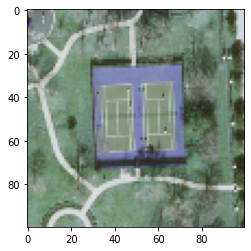

In [95]:
import matplotlib.pyplot as plt

plt.imshow(X[30])
plt.show()

In [96]:
import os
import re
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.models import load_model

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [97]:
X.dtype

dtype('uint8')

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.astype('float32') #set x_train data type as float32
X_test = X_test.astype('float32') #set x_test data type as float32
X_train /= 255 #change x_train value between 0 - 1
X_test /= 255 #change x_test value between 0 - 1
y_train = to_categorical(y_train, 21) #change label to binary / categorical: [1 0 0 0] = 0, [0 1 0 0] = 1, so on
y_test = to_categorical(y_test, 21) #change label to binary / categorical

In [99]:
print(y_train[30])
print(y_train[31])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


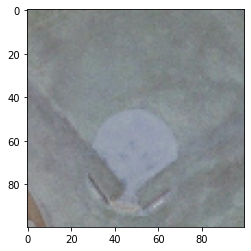

In [100]:
plt.imshow(X_train[35])
plt.show()

In [101]:
X_train.shape

(1407, 100, 100, 3)

In [102]:
model = Sequential() #model = sequential 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3))) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Conv2D(32, (3, 3), activation='relu')) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Dropout(0.25)) #delete neuron randomly while training and remain 75%
model.add(Flatten()) #make layer flatten
model.add(Dense(128, activation='relu')) #fully connected layer
model.add(Dropout(0.5)) #delete neuron randomly and remain 50%
model.add(Dense(21, activation='softmax')) #softmax works

In [103]:
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 23, 23, 32)        0         
                                                                 
 flatten_7 (Flatten)         (None, 16928)            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [104]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/25
44/44 [==============================] - 16s 359ms/step - loss: 3.0473 - accuracy: 0.0498 - val_loss: 3.0236 - val_accuracy: 0.0649
Epoch 2/25
44/44 [==============================] - 15s 352ms/step - loss: 2.9945 - accuracy: 0.0931 - val_loss: 2.9422 - val_accuracy: 0.0895
Epoch 3/25
44/44 [==============================] - 15s 352ms/step - loss: 2.8733 - accuracy: 0.1230 - val_loss: 2.8297 - val_accuracy: 0.1241
Epoch 4/25
44/44 [==============================] - 15s 348ms/step - loss: 2.7290 - accuracy: 0.1649 - val_loss: 2.5868 - val_accuracy: 0.1732
Epoch 5/25
44/44 [==============================] - 15s 350ms/step - loss: 2.4497 - accuracy: 0.2416 - val_loss: 2.4385 - val_accuracy: 0.2525
Epoch 6/25
44/44 [==============================] - 15s 349ms/step - loss: 2.2238 - accuracy: 0.3141 - val_loss: 2.2204 - val_accuracy: 0.2973
Epoch 7/25
44/44 [==============================] - 16s 363ms/step - loss: 2.0528 - accuracy: 0.3639 - val_loss: 2.1482 - val_accuracy: 0.3463

In [105]:
from keras.models import load_model

model = model.save('/content/drive/My Drive/dataset/ucmerced/model.h5')
model_baru = load_model('/content/drive/My Drive/dataset/ucmerced/model.h5')

y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model_baru.predict(X_test),axis=1)
# Print classification report after a train/test split:
print('classifiation report')
print(classification_report(y_test_arg, Y_pred, target_names=mapping.values()))

print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

classifiation report
                   precision    recall  f1-score   support

      tenniscourt       0.28      0.24      0.26        29
       golfcourse       0.33      0.21      0.26        28
           harbor       0.55      0.61      0.57        38
     intersection       0.45      0.46      0.46        41
mediumresidential       0.17      0.05      0.08        39
   mobilehomepark       0.38      0.41      0.40        39
         overpass       0.34      0.48      0.40        27
       parkinglot       0.44      0.57      0.49        30
            river       0.54      0.42      0.47        31
           runway       0.64      0.48      0.55        33
sparseresidential       0.40      0.19      0.26        32
     storagetanks       0.19      0.16      0.17        31
     agricultural       0.43      0.62      0.51        24
         airplane       0.58      0.62      0.60        42
  baseballdiamond       0.69      0.45      0.55        40
            beach       0.81      

**Kesimpulan Klasifikasi Model**

- Performa Model: Model klasifikasi yang telah dilatih memiliki tingkat akurasi sebesar 46.61%. Akurasi mengukur sejauh mana model berhasil dalam mengklasifikasikan data dengan benar. Dalam kasus ini, akurasi yang relatif rendah menunjukkan bahwa model mungkin memiliki kesulitan dalam membedakan kelas-kelas tertentu.

- Metrik Klasifikasi: Melihat metrik presisi (precision), recall, dan F1-score untuk masing-masing kelas, kita dapat melihat bahwa performa model bervariasi tergantung pada kelasnya. Beberapa kelas memiliki presisi, recall, dan F1-score yang tinggi, sementara yang lain memiliki nilai yang lebih rendah. Sebagai contoh, kelas "beach" memiliki kinerja yang sangat baik dengan presisi, recall, dan F1-score yang tinggi.

- Confusion Matrix: Confusion matrix memberikan pandangan lebih detail tentang seberapa baik model mengklasifikasikan setiap kelas. Kita dapat melihat bahwa terdapat beberapa kelas di mana model memiliki jumlah prediksi yang benar (diagonal utama) yang tinggi, sementara ada juga kelas-kelas di mana terdapat banyak prediksi yang salah di luar diagonal utama.

- Variabilitas Kinerja: Kinerja model sangat bervariasi antara kelas-kelas. Beberapa kelas mungkin lebih mudah untuk diprediksi daripada yang lain, dan hal ini dapat memengaruhi keseluruhan akurasi model.

Dalam kesimpulan, model klasifikasi yang telah dilatih dapat mengklasifikasikan data dengan akurasi 46.61%, tetapi performanya bervariasi antara kelas-kelas. Perbaikan mungkin diperlukan untuk penelitian kedepannya untuk meningkatkan kinerja model terutama pada kelas-kelas dengan hasil yang kurang memuaskan.
